# [DSP] Section 4
[[REF | AudioSignalProcessingForML]](https://github.com/musikalkemist/AudioSignalProcessingForML)

## 10. Fourier Transform: The Intuition
### Intuition
- Decompose a complex sound into its frequency components
- Compare signal with sinusoids of various frequencies
- For each freq. we get a magnitude and a phase
- High magnitude indicates high similarity between the signal and a sinusoid

### From time to frequency domain
- Time -> TF -> Freq.


In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
audio_path = "./raw/10_audio/piano_c.wav"
ipd.Audio(audio_path)

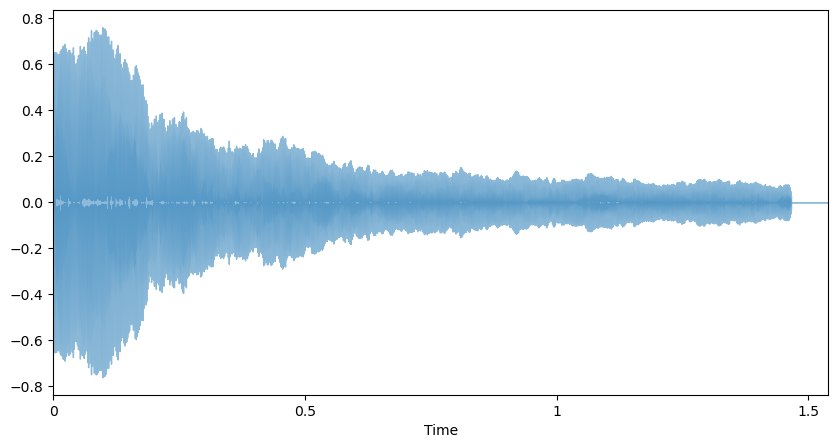

In [5]:
signal, sr = librosa.load(audio_path)

# # plot waveform
plt.figure(figsize=(10, 5))
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.show()

In [7]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

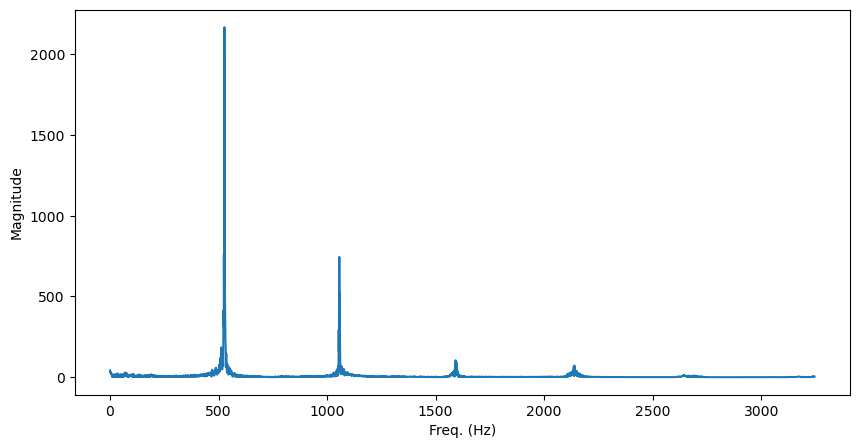

In [10]:
# plot spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Freq. (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [11]:
len(signal)

33968

In [12]:
d = 1/sr
d

4.5351473922902495e-05

In [13]:
d_523 = 1/523
d_523

0.0019120458891013384

In [14]:
d_400_samples = 400*d
d_400_samples

0.018140589569160998

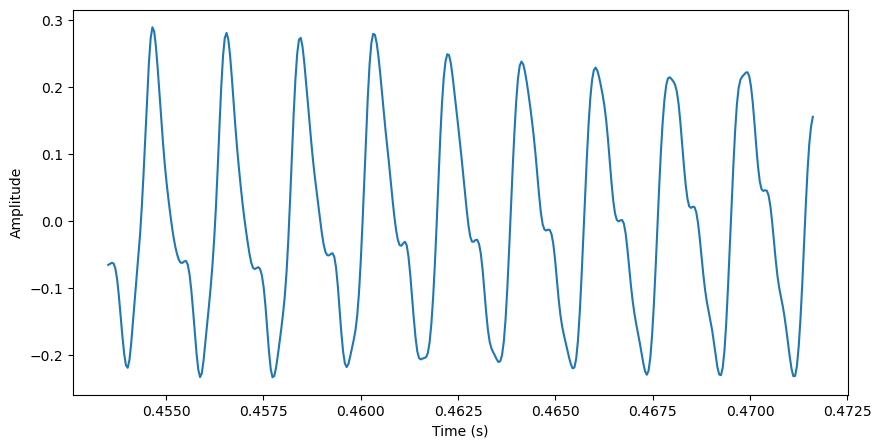

In [15]:
# zoom in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(10, 5))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Sine Wave
$$sin(2\pi \times (ft-\varphi))$$

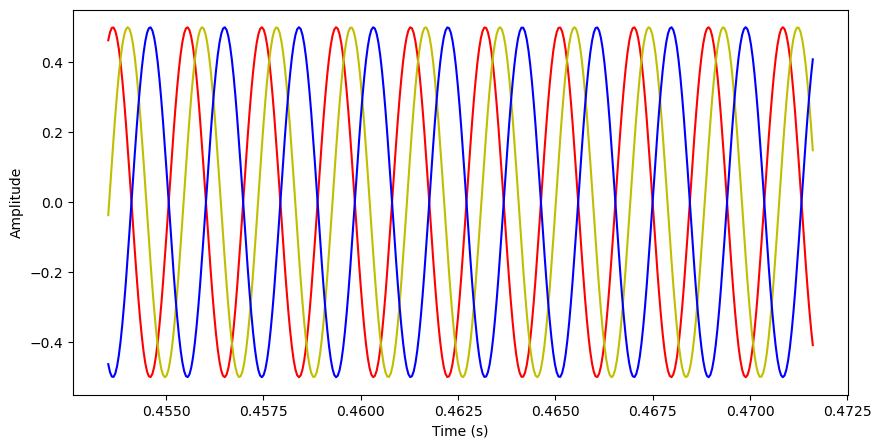

In [20]:
# create sinusoids
f = 523
phase = 0
phase2 = 0.2
phase3 = 0.5

sin = 0.5 * np.sin(2*np.pi * (f*t-phase))
sin2 = 0.5 * np.sin(2*np.pi * (f*t-phase2))
sin3 = 0.5 * np.sin(2*np.pi * (f*t-phase3))

plt.figure(figsize=(10, 5))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")
plt.plot(t[10000:10400], sin3[10000:10400], color="b")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

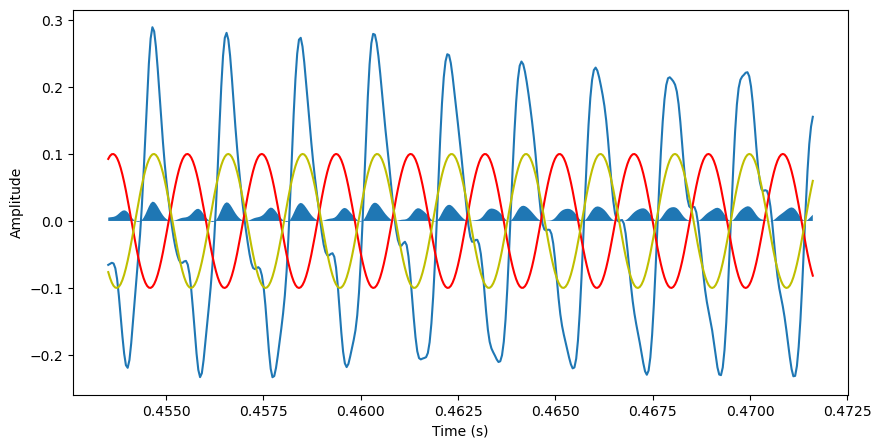

In [ ]:
# compare signal and sinusoids
f = 523
phase = 0
phase2 = 0.55

sin = 0.1*np.sin(2*np.pi*(f*t-phase))
sin2 = 0.1*np.sin(2*np.pi*(f*t-phase2))

plt.figure(figsize=(10, 5))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")

plt.fill_between(t[10000:10400], sin2[10000:10400]*signal[10000:10400])

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

###  Fourier transform: Step by step
- Choose a frequency -> Optimise phase -> Calculate magnitude

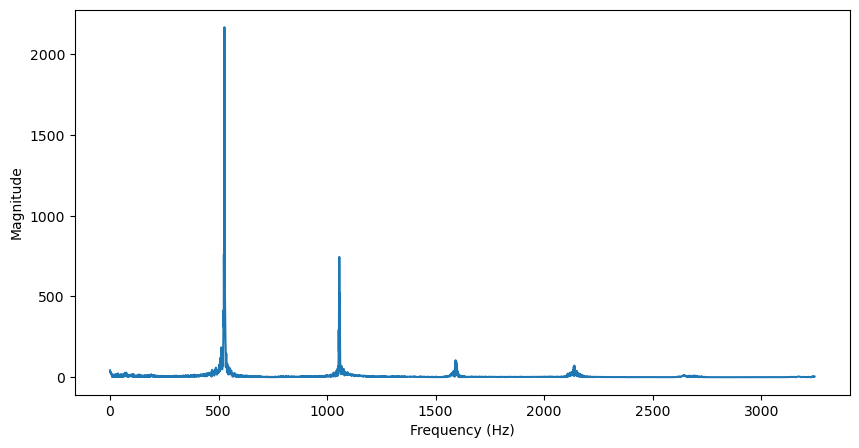

In [25]:
# plot spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### Fourier transform
$$\varphi_f = argmax_{ \varphi \in [0, 1) } (\int s(t) \cdot \sin(2\pi \cdot (ft-\varphi) ) \cdot dt)$$

$$d_f = max_{\varphi \in [0, 1)} (\int s(t) \cdot sin(2\pi \cdot (ft-\varphi)) \cdot dt)$$

### Reconstructing a signal
- Superimpose sinusoids
- Weight them by the relative magnitude
- Use relative phase
- Original signal and FT have same information

### Inverse Fourier Transform

## 11. Complex numbers for audio signal processing
### Why bother with complex numbers?
- Fourier transform -> magnitude and phase
- Magnitude is a real number
- ... someting with magnitude + phase? -> COMPLEX Number

### The genesis of CNs (복소수의 기원)
- $\sqrt -1 = i^2 = -1$
- $c=a+ib$

### Polar coordinate representation
- $cos(\gamma) = { a \over |c| }$
- $sin(\gamma) = { b \over |c| }$
- ${ sin(\gamma) \over cos(\gamma) } = { b \over a }$
- $\gamma = arctan( { b \over a } )$

$a=|c| \cdot cos(\gamma) \ \ \ b=|c| \cdot sin(\gamma)$  
$c=a+ib = |c| \cdot ( cos(\gamma) + isin(\gamma) )$

### Euler formula
$e^{i\gamma} = cos(\gamma) + isin(\gamma)$

### Euler identity
$e^{i\pi} + 1 = 0$

### Polar coordinates
$c=|c| \cdot e^{i\gamma}$
- $|c|$: Scales distance from origin
- $e^{i\gamma}$: Direction of a number in the complex plane

## 12. Defining the Fourier transform using complex numbers